<center><h1>𝓣𝓮𝓻𝓶 𝓕𝓻𝓮𝓺𝓾𝓮𝓷𝓬𝔂 𝓪𝓷𝓭 𝓲𝓷𝓿𝓮𝓻𝓼𝓮 𝓭𝓸𝓬𝓾𝓶𝓮𝓷𝓽 𝓯𝓻𝓮𝓺𝓾𝓮𝓷𝓬𝔂</h1></center>


<center><img src="https://miro.medium.com/max/1400/0*iJ4UYrs8GEt_wObP.gif" width="600"/></center>

More `NLP` tasks, we often get the training and testing data as a **raw text**. However, the raw text is not acceptable by any **ML models**, it accepts only numbers. We need to find a way that helps convert the raw text to some sort of numbers. 

There are lots of techniques available like count vectorizer, embeddings, TFIDF vectorizer, and more. 

Let's see the TFIDF Vectorizer. Before going ahead let's break down the topic: 

`T` -> Term 

`F` -> Frequency

`I` -> Inverse 

`D` -> Document 

`F` -> Frequency 

`Vectorizer` -> A corpus of documents can thus be represented by a matrix with one row per document and one column per token (e.g. word) occurring in the corpus. This is called **vectorization** the general process of turning a collection of text documents into numerical feature vectors. 

Before heading down to see this, we need to cover the small topic called one hot encoding. After understanding the one hot encoding, we can understand the TFIDF very easily. 


**`OneHotEncoding(OHR):`**
* A simple way to convert the words to numbers. 
* It just a count based representation. Its a vector of fixed length. 

One hot encoding is one method of converting data to prepare it for an algorithm and get a better prediction. With one-hot, we convert each categorical value into a new categorical column and assign a binary value of 1 or 0 to those columns. Each integer value is represented as a binary vector. All the values are zero, and the index is marked with a 1.

**For example:**

Consider this is our text is `"Time flies likes an arrow, Fruit flies like an banana "`. 
Before converting it We need to remove the punctuation, and lowering the characters and take only unique characters, so our vocabulary is `{ time, fruit, flies, like, a, an, arrow, banana }`

Let's try to represent this word in vector. 

`Hint:` wherever we have a word, will try to put the `1` otherwise `0`. 


<center><img src="images/example1.png" width="600"/></center>

Here, see carefully we just put the value `1`, wherever we have word, otherwise we just simply put the value `0`. This is one hot encoding. You can consider this as a `8 dimensional vector space`. 

It is also called `one hot` or **`binary representation`**. 

OHR representation: 
 [[1 1 0 1 0 1 1]
 [0 0 1 1 1 1 0]]

 Corpus:  ['Time flies flies like an arrow.', 'Fruit flies like a banana.']

 vocab:  ['an', 'arrrow', 'banana', 'flies', 'fruit', 'like', 'time']

			 Visual Representation: 



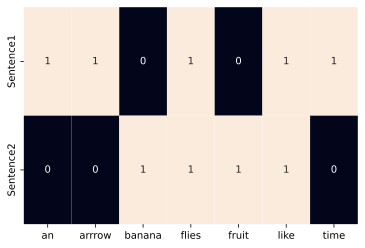

In [10]:
# Let's see this in code!

# Import the necessary libraries 
import re 
import warnings 
import numpy as np 
import seaborn as sns 
from IPython import display   # This is for svg image as output 
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
display.set_matplotlib_formats('svg')
from sklearn.feature_extraction.text import CountVectorizer  # One hot encoder library 

# Input text 
corpus = ['Time flies flies like an arrow.', 
          'Fruit flies like a banana.']

# Initialize the Onehotencoder by specifying binary = True 
one_hot = CountVectorizer(binary = True)  

# Fit our input text to the OHR and conver to array 
one_hot_vec = one_hot.fit_transform(corpus).toarray()
print('OHR representation: \n', one_hot_vec)   

# For visualization purpose
vocab = ['an', 'arrrow', 'banana', 'flies', 'fruit', 'like', 'time']   # after preprocessing like lowering, removing punctuations and taking only letters fron the corpus. 
sns.heatmap(one_hot_vec, annot=True, cbar = False, xticklabels = vocab, yticklabels =['Sentence1', 'Sentence2']);

# corpus 
print('\n Corpus: ', corpus)
print('\n vocab: ', vocab)

print('\n\t\t\t Visual Representation: \n')

OHR representation: 
 [[1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1 0 1]
 [0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 0]]

 Corpus:  ['I just want to explore the world with happiness and feeling awesome!', 'Everybody not like me, they are focussing on only work compare to enjoying the life']

 vocab:  ['and' 'are' 'awesome' 'compare' 'enjoying' 'everybody' 'explore'
 'feeling' 'focussing' 'happiness' 'i' 'just' 'life' 'like' 'me' 'not'
 'on' 'only' 'the' 'they' 'to' 'want' 'with' 'work' 'world']

				    Visual Representation: 



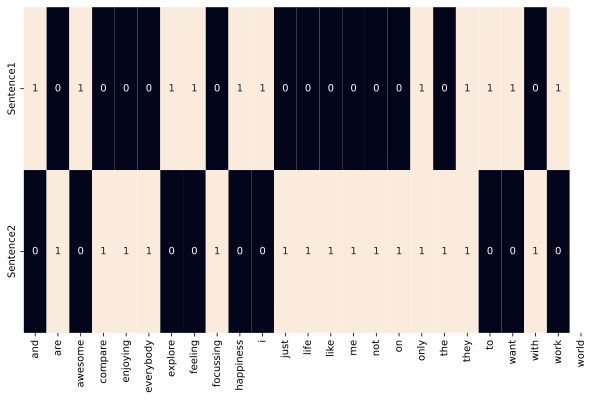

In [15]:
# Let's see some more examples with bigger text~ 
corpus = ['I just want to explore the world with happiness and feeling awesome!', 
          'Everybody not like me, they are focussing on only work compare to enjoying the life']

# Create a function, that preprocess the text and give the vocabulary names! 
def preprocess(text): 
      data = str(text)[1:-1]   # just removing list to string 
      data = data.lower()
      data = re.findall('\w+', data)  # w -> words, + -> multiple words 
      data = np.unique(data)
      return data

one_hot = CountVectorizer(binary = True)   # one hot representation 
one_hot_vec = one_hot.fit_transform(corpus).toarray()

vocab = preprocess(corpus)  # after preprocessing like lowering, removing punctuations and taking only letters fron teh corpus. 

# plotting! 
plt.figure(figsize = (10,6))
sns.heatmap(one_hot_vec, annot=True, cbar = False, xticklabels = vocab, yticklabels =['Sentence1', 'Sentence2']);


print('OHR representation: \n', one_hot_vec)   

# corpus 
print('\n Corpus: ', corpus)
print('\n vocab: ', vocab)

print('\n\t\t\t\t    Visual Representation: \n')

This the high level definition of the OHR. This is what we not exactly needed, see it just puts a value 1 or 0 based on the word present or not!

It don't give any meaningful information to us, you can use this for discrete value but not for converting the large raw text to numbers, this is not an efficient way, It has lot's of dis-advantages like it requires huge space (here in the example we done for just 2 sentence and end up with `2 x 26` dimensional vector, what if we have very large text?)

Another disadvantage of one-hot encoding is that it produces multicollinearity among the various variables, lowering the model’s accuracy.

* The representation size grows with the corpus. So it does not scale for say representing a word in a large corpus ( e.g each word vector for a 50 million corpus will be say 50 million float values all but one being a zero)
* Each vector is equidistant from every other vector in a one hot encoding. While this may be ideal in some scenarios where each movie is represented by a vector in a recommendation system model on an equal footing, for NLP tasks a distributed representation may capture more information about a word ( assuming we train them using an unsupervised model like word2vec, fasttext etc ) and would be a better representation of a word for downstream tasks like tagging, entity recognition etc.
* Too sparse given a large corpus → computationally too expensive
* No contextual/semantic information embedded in one-hot vectors → not readily suitable for tasks like POS tagging, named-entity recognition, etc.

Here, we understood the dis-advantage by using **OHR**, now we let's try to understand the **TF&IDF**. 

## TF IDF: 
* Same like previous method, but we need some formula change here! 
* This is a technique to quantify words in a set of documents. We generally compute a score for each word to signify its importance in the document and corpus. This method is a widely used technique in **`Information Retrieval and Text Mining`**.


### Term Frequency: 
* This measures the frequency of a word in a document. This highly depends on the length of the document and the generality of the word, for example, a very common word such as “was” can appear multiple times in a document. But if we take two documents with 100 words and 10,000 words respectively, there is a high probability that the common word “was” is present more in the 10,000 worded document. But we cannot say that the longer document is more important than the shorter document. For this exact reason, we perform normalization on the frequency value, we divide the frequency with the total number of words in the document.
* Recall that we need to finally vectorize the document. When we plan to vectorize documents, we cannot just consider the words that are present in that particular document. If we do that, then the vector length will be different for both the documents, and it will not be feasible to compute the similarity. So, what we do is that we vectorize the documents on the vocab. Vocab is the list of all possible worlds in the corpus.
* We need the word counts of all the vocab words and the length of the document to compute TF. In case the term doesn’t exist in a particular document, that particular TF value will be 0 for that particular document. In an extreme case, if all the words in the document are the same, then TF will be 1. The final value of the normalised TF value will be in the range of [0 to 1]. 0, 1 inclusive.

TF is individual to each document and word, hence we can formulate TF as follows:

<center><h3>tf(t,d) = count of t in d / number of words in d</h3></center>


If we already computed the TF value and if this produces a vectorized form of the document, why not use just TF to find the relevance between documents? Why do we need IDF?

* Let me explain, words which are most common such as ‘is’, ‘are’ will have very high values, giving those words very high importance. But using these words to compute the relevance produces bad results. These kinds of common words are called stop-words. Although we will remove the stop words later in the preprocessing step, finding the presence of the word across the documents and somehow reduce their weightage is more ideal.

### Document Frequency
This measures the importance of documents in a whole set of the corpus. This is very similar to TF but the only difference is that TF is the frequency counter for a term t in document d, whereas DF is the count of occurrences of term t in the document set N. In other words, DF is the number of documents in which the word is present. We consider one occurrence if the term is present in the document at least once, we do not need to know the number of times the term is present.

<center><h3>df(t) = occurrence of t in N documents</h3></center>

To keep this also in a range, we normalize by dividing by the total number of documents. Our main goal is to know the informativeness of a term, and DF is the exact inverse of it. that is why we inverse the DF

### Inverse Document Frequency
IDF is the inverse of the document frequency which measures the informativeness of term t. When we calculate IDF, it will be very low for the most occurring words such as stop words (because they are present in almost all of the documents, and N/df will give a very low value to that word). This finally gives what we want, a relative weightage.

<center><h3>idf(t) = N/df</h3></center>

Now there are few other problems with the IDF, when we have a large corpus size say N=10000, the IDF value explodes. So to dampen the effect we take the log of IDF.

At query time, when the word is not present in is not in the vocab, it will simply be ignored. But in few cases, we use a fixed vocab and few words of the vocab might be absent in the document, in such cases, the df will be 0. As we cannot divide by 0, we smoothen the value by adding 1 to the denominator.

<center><h3>idf(t) = log(N/(df + 1))</h3></center>

Finally, by taking a multiplicative value of TF and IDF, we get the TF-IDF score. There are many different variations of TF-IDF but for now, let us concentrate on this basic version.

<center><h2>tf-idf(t, d) = tf(t, d) * log(N/(df + 1))</h2></center>

Now, you know how to calcualte the TF * IDF. It's cool! Now that you can create a table of TFIDF on your own! 


<center><img src="https://miro.medium.com/max/1200/1*qQgnyPLDIkUmeZKN2_ZWbQ.png" width="600"/></center>

In [16]:
# Let's see this in code now!
corpus = "Python is an interpreted, object-oriented, high-level programming language with dynamic semantics. Its high-level built in data structures, combined with dynamic typing and dynamic binding, make it very attractive for Rapid Application Development, as well as for use as a scripting or glue language to connect existing components together. Python's simple, easy to learn syntax emphasizes readability and therefore reduces the cost of program maintenance. Python supports modules and packages, which encourages program modularity and code reuse. The Python interpreter and the extensive standard library are available in source or binary form without charge for all major platforms, and can be freely distributed.Often, programmers fall in love with Python because of the increased productivity it provides. Since there is no compilation step, the edit-test-debug cycle is incredibly fast. Debugging Python programs is easy: a bug or bad input will never cause a segmentation fault. Instead, when the interpreter discovers an error, it raises an exception. When the program doesn't catch the exception, the interpreter prints a stack trace. A source level debugger allows inspection of local and global variables, evaluation of arbitrary expressions, setting breakpoints, stepping through the code a line at a time, and so on. The debugger is written in Python itself, testifying to Python's introspective power. On the other hand, often the quickest way to debug a program is to add a few print statements to the source: the fast edit-test-debug cycle makes this simple approach very effective."

In [84]:
corpus = 'Time flies flies like an arrow. Fruit flies like a banana.'

In [85]:
# Import libraries 

import re
import nltk 
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer, WordNetLemmatizer 

In [86]:
# Initializing the classes 

stemmer = PorterStemmer() 
lemmatizer = WordNetLemmatizer()

### Clean the sentences 

In [87]:
# let's create a function to clean the sentences: 
def cleaner(sentences):
    new_corpus = []
    sentences = nltk.sent_tokenize(corpus)
    for i in range(len(sentences)):
        new = re.sub('[^a-zA-Z]', ' ', sentences[i])
        new = new.lower()
        new = new.split()
        new = [ lemmatizer.lemmatize(word) for word in new if word not in set(stopwords.words('english'))]
        new = ' '.join(new)
        new_corpus.append(new)
        
    return new_corpus

In [88]:
new_corpus = cleaner(sentences)
new_corpus

['time fly fly like arrow', 'fruit fly like banana']

### Let change this sentences into vectors using TFIDF function

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer  # library for tfidf 

tf = TfidfVectorizer()

vec = tf.fit_transform(new_corpus).toarray()
vec

array([[0.46977774, 0.        , 0.66850146, 0.        , 0.33425073,
        0.46977774],
       [0.        , 0.57615236, 0.40993715, 0.57615236, 0.40993715,
        0.        ]])

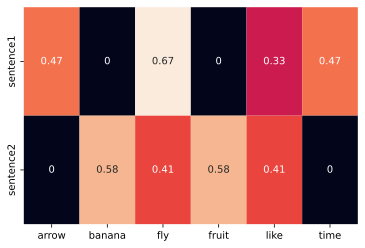

In [91]:
sns.heatmap(vec, annot=True, cbar = False, xticklabels = tf.get_feature_names(), yticklabels = ['sentence1', 'sentence2']);

In [99]:
# Let's try to do it in one funciton: 

def vectorizer(text):
    clean_text = cleaner(text)  # clean the text 
    tf = TfidfVectorizer()
    vec = tf.fit_transform(clean_text).toarray()
    return vec, tf.get_feature_names(), clean_text 


 Clean Text ['dr p j', 'abdul kalam october july th president india', 'born raised rameswaram tamil nadu studied physic aerospace engineering', 'became foremost missile man india led nation path becoming strong nuclear power leadership']

 Vocabulary ['abdul', 'aerospace', 'became', 'becoming', 'born', 'dr', 'engineering', 'foremost', 'india', 'july', 'kalam', 'leadership', 'led', 'man', 'missile', 'nadu', 'nation', 'nuclear', 'october', 'path', 'physic', 'power', 'president', 'raised', 'rameswaram', 'strong', 'studied', 'tamil', 'th']


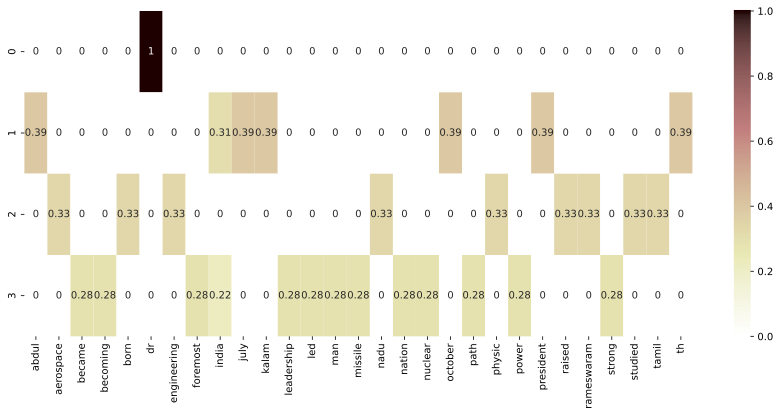

In [101]:
# Let's try with complicated sentences: 

corpus = 'Dr. A.P.J. Abdul Kalam (15 October 1931 – 27 July 2015) was the 11th President of India. He was born and raised in Rameswaram, Tamil Nadu, and studied physics and aerospace engineering. He became the foremost missile man of India and led the nation on its path into becoming a strong nuclear power under his leadership. '

# text to vector
vectors, feature_names, clean_text = vectorizer(corpus)
print('\n Clean Text', clean_text)
print('\n Vocabulary', feature_names)

# plot the vector using seaborn 
plt.figure(figsize = (15,6))
sns.heatmap(vectors, annot=True, cbar = True, xticklabels = feature_names, cmap = 'pink_r');

In [106]:
# some usefull attributes 
tf.get_params(['abdul'])

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 1),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}


 Clean Text ['proverb adage often used interchangeably express folk wisdom advice truism fine line dividing two', 'whereas proverb express folk wisdom advice adage express truism accumulated century millennium', 'adage around much longer proverb proverb widely used']

 Vocabulary ['accumulated', 'adage', 'advice', 'around', 'century', 'dividing', 'express', 'fine', 'folk', 'interchangeably', 'line', 'longer', 'millennium', 'much', 'often', 'proverb', 'truism', 'two', 'used', 'whereas', 'widely', 'wisdom']


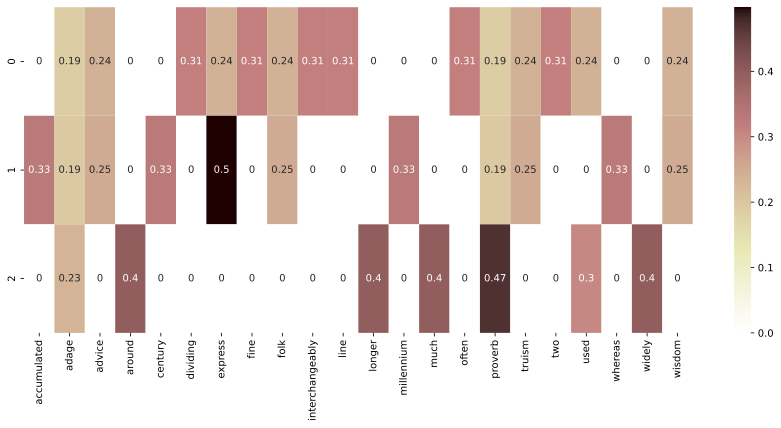

In [118]:
# Let's try with different sentences: 
corpus = "Proverbs and adages are often used interchangeably to express folk wisdom, advice, and truisms, but there is a fine line dividing the two. Whereas proverbs express folk wisdom or advice, adages express truisms accumulated over centuries and millenniums. Adages have been around for much longer than proverbs, but proverbs are more widely used."

# text to vector
vectors, feature_names, clean_text = vectorizer(corpus)
print('\n Clean Text', clean_text)
print('\n Vocabulary', feature_names)

# plot the vector using seaborn 
plt.figure(figsize = (15,6))
sns.heatmap(vectors, annot=True, cbar = True, xticklabels = feature_names, cmap = 'pink_r');

<center><img src="https://thumbs.gfycat.com/UncomfortableHatefulKakarikis-size_restricted.gif" width="600"/></center>